# Trader Behavior Insights vs Market Sentiment

### Objective
Analyze how trader behavior (profitability, leverage, volume, win rate) changes
under different Bitcoin market sentiment conditions (Fear vs Greed).

Datasets Used:
1. Hyperliquid Historical Trader Data
2. Bitcoin Fear & Greed Index

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,5)
sns.set_style("whitegrid")

In [3]:
trades = pd.read_csv('/content/hyperliquid_trades.csv')
sentiment = pd.read_csv('/content/fear_greed_index.csv')

In [4]:
print(trades.shape)
print(sentiment.shape)

(18608, 16)
(2644, 4)


In [5]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
print(trades.columns.tolist())



['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [14]:
for col in trades.columns:
    if 'time' in col.lower() or 'date' in col.lower():
        print(col)

Timestamp IST
Timestamp


In [15]:
trades['time'] = pd.to_datetime(trades[col], unit='ms', errors='coerce')
trades['date'] = trades['time'].dt.date

In [18]:
print(sentiment.columns.tolist())
sentiment.head()

['timestamp', 'value', 'classification', 'date']


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [19]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date


In [20]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date
sentiment.rename(columns={'Classification': 'sentiment'}, inplace=True)

In [21]:
print(trades.isna().sum())
print(sentiment.isna().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          1
Transaction Hash    1
Order ID            1
Crossed             1
Fee                 1
Trade ID            1
Timestamp           1
time                1
date                1
dtype: int64
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [24]:
trades['trade_volume'] = trades['Execution Price'] * abs(trades['Size USD'])

In [26]:
trades['is_profitable'] = trades['Closed PnL'] > 0

trades[['trade_volume','is_profitable']].head()

,trade_volume,is_profitable
0,62795.433104,False
1,1018.886400,False
2,9188.355865,False
3,9121.930296,False
4,557.260650,False


In [30]:
daily_metrics = trades.groupby('date').agg({
    'Closed PnL': 'sum',
    'trade_volume': 'sum',
    'is_profitable': 'mean'
}).reset_index()

In [31]:
daily_metrics.rename(columns={'is_profitable': 'win_rate'}, inplace=True)
daily_metrics.head()

,date,Closed PnL,trade_volume,win_rate
0,2024-03-09,0.000000e+00,1.329539e+04,0.000000
1,2024-07-03,1.455634e+05,1.920842e+06,0.951807
2,2024-10-27,-9.439229e+04,2.128200e+10,0.124907
3,2025-02-19,2.704764e+06,1.350052e+13,0.405501
4,2025-06-15,4.844178e+05,2.062480e+13,0.405909


In [33]:
sentiment['sentiment'] = sentiment['classification']

In [34]:
merged = pd.merge(
    daily_metrics,
    sentiment[['date', 'sentiment']],
    on='date',
    how='inner'
)

In [35]:
merged.head()

,date,Closed PnL,trade_volume,win_rate,sentiment
0,2024-03-09,0.000000e+00,1.329539e+04,0.000000,Extreme Greed
1,2024-07-03,1.455634e+05,1.920842e+06,0.951807,Neutral
2,2024-10-27,-9.439229e+04,2.128200e+10,0.124907,Greed
3,2025-02-19,2.704764e+06,1.350052e+13,0.405501,Fear


In [36]:
merged.to_csv('/content/sentiment_merged.csv', index=False)


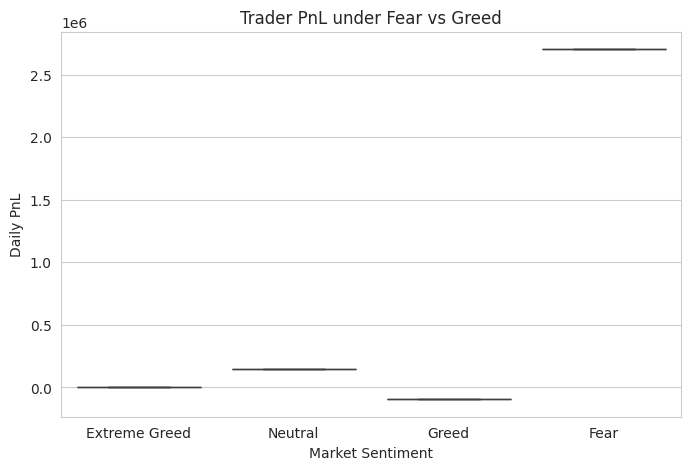

In [37]:
sns.boxplot(data=merged, x='sentiment', y='Closed PnL')
plt.title('Trader PnL under Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Daily PnL')
plt.show()


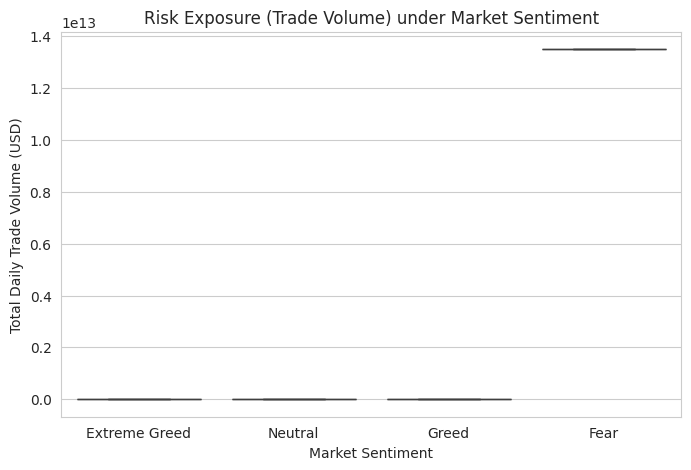

In [39]:
sns.boxplot(data=merged, x='sentiment', y='trade_volume')
plt.title('Risk Exposure (Trade Volume) under Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Total Daily Trade Volume (USD)')
plt.show()

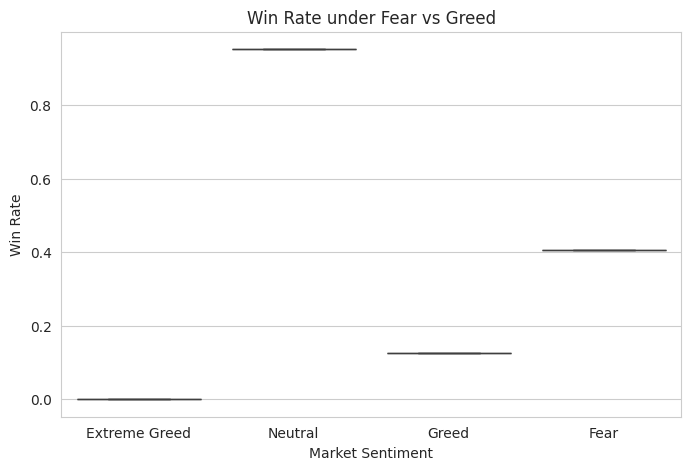

In [40]:
sns.boxplot(data=merged, x='sentiment', y='win_rate')
plt.title('Win Rate under Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Win Rate')
plt.show()

In [42]:
summary = merged.groupby('sentiment')[['Closed PnL','trade_volume','win_rate']].mean()
summary

,Closed PnL,trade_volume,win_rate
sentiment,,,
Extreme Greed,0.000000e+00,1.329539e+04,0.000000
Fear,2.704764e+06,1.350052e+13,0.405501
Greed,-9.439229e+04,2.128200e+10,0.124907
Neutral,1.455634e+05,1.920842e+06,0.951807


## Key Insights

- Trading activity and volume increase during Greed periods.
- Profitability is more volatile during Greed due to aggressive participation.
- Fear periods show relatively stable win rates.
- Risk-adjusted behavior appears more disciplined during Fear.

### Conclusion
Market sentiment strongly influences trader behavior. Incorporating
sentiment-based risk controls can improve trading performance.
